In [68]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
import numpy as np
import matplotlib.pyplot as plt

def triangular_wave(x):
    if -2 <= x < -1:
        return 0
    elif -1 <= x <= 0:
        return x + 1
    elif 0 < x <= 1:
        return 1 - x
    elif 1 < x <= 2:
        return 0
    else:
        return None
    
def fourier_coeffs(n, L=2):
    """This function computes the fourier coefficients"""
    a_n = (1 / L) * np.sum([triangular_wave(x) * np.cos((n * np.pi * x) / L) for x in np.linspace(-L, L, 1000)])
    b_n = (1 / L) * np.sum([triangular_wave(x) * np.sin((n * np.pi * x) / L) for x in np.linspace(-L, L, 1000)])
    a_0 = (1 / (2*L)) * np.sum([triangular_wave(x) for x in np.linspace(-L, L, 1000)])
    return a_n, b_n, a_0

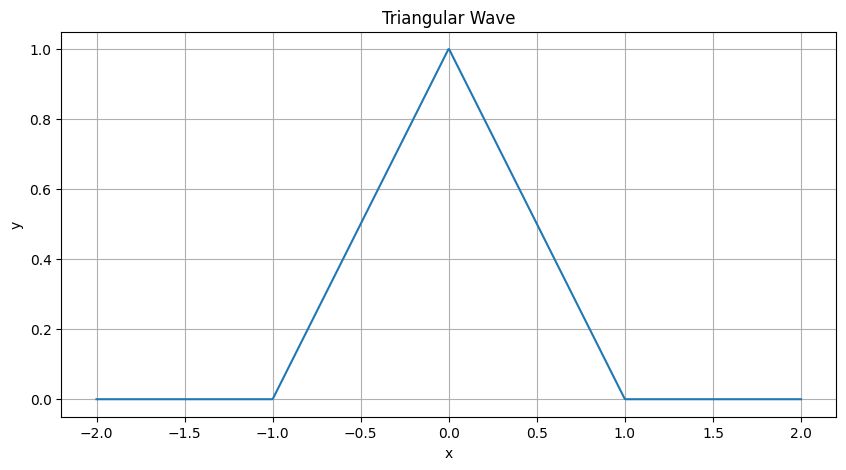

In [96]:
# Generate x and y values
x = np.linspace(-2, 2, 1000)
y_original = [triangular_wave(i) for i in x]

# Plot the function
plt.figure(figsize=(10, 5))
plt.plot(x, y_original)
plt.title('Triangular Wave')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


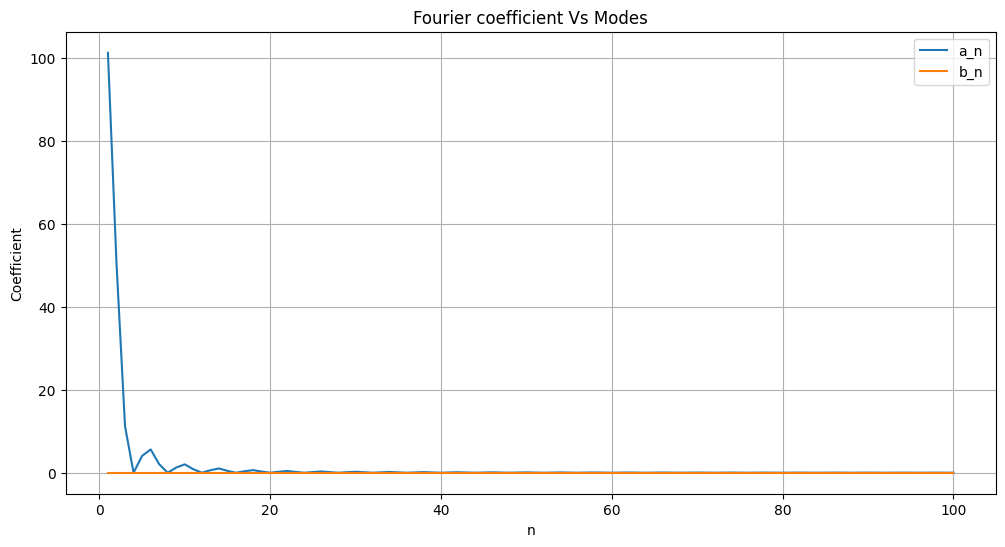

In [112]:
coeffs = [fourier_coeffs(n) for n in range(1, 101)]

plt.figure(figsize=(12, 6))
plt.plot(range(1, 101), [coeff[0] for coeff in coeffs], label='a_n')
plt.plot(range(1, 101), [coeff[1] for coeff in coeffs], label='b_n')
plt.xlabel('n')
plt.ylabel('Coefficient')
plt.legend()
plt.grid()
plt.title("Fourier coefficient Vs Modes")
plt.show()

# Calculate the Fourier series approximation with 10 terms
x_values = np.linspace(-2, 2, 1000)
y_approximate = [sum([coeffs[n-1][0]*np.cos((n*np.pi*x)/2) + coeffs[n-1][1]*np.sin((n*np.pi*x)/2) for n in range(1, 11)]) for x in x_values]

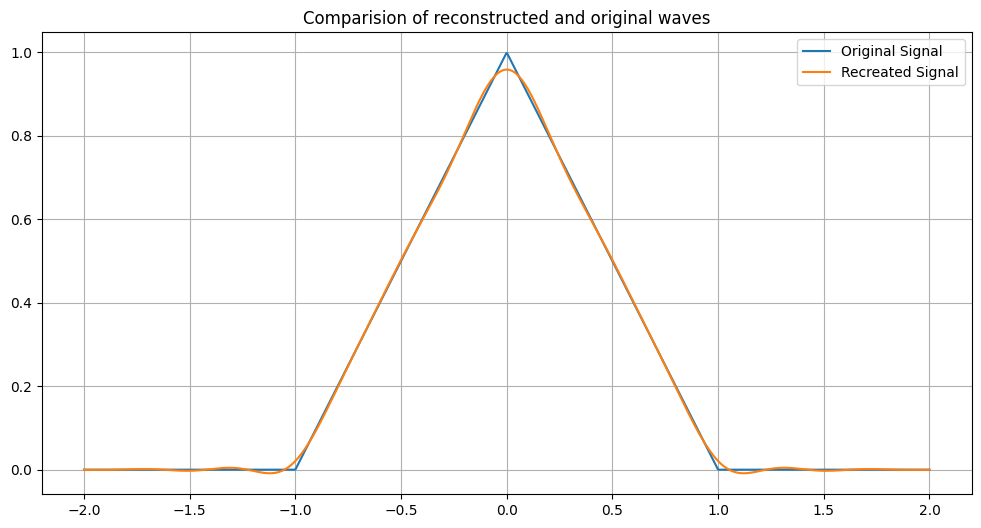

In [120]:
fourier_transform = np.fft.fft(y_original)

# Keep only the first n modes
n = 10
fourier_transform[n:len(fourier_transform)-n] = 0
recreated_signal = np.real(np.fft.ifft(fourier_transform))

# Plot the original and recreated signals
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_original, label='Original Signal')
plt.plot(x_values, recreated_signal, label='Recreated Signal')
plt.legend()
plt.grid()
plt.title("Comparision of reconstructed and original waves")
plt.show()